# Product Recommendation - Stress Test
This time, let's make a recommendation for a very popular product to see if our algorithm can handle the load of the high number of reviews.

Note: this case required filtering of reviews to avoid overloading the system and also improve relevance as a side effect. The changes have been rolled into the shared workflow used by all worksheets.

In [66]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
%autoreload

import matplotlib.pyplot as plt
import pandas as pd

import shared.query as q
import shared.viz as viz
import shared.reviews as rev

viz.set_style()

In [68]:
conn = q.connect('data/products.sql')

In [69]:
products = q.query("""
SELECT id, p.title, creator, description, release_date, COUNT(*) AS reviews, category, subcategory
FROM review r JOIN product p ON r.product_id = p.id
GROUP BY product_id
ORDER BY reviews DESC LIMIT 100
""", conn)


SELECT id, p.title, creator, description, release_date, COUNT(*) AS reviews, category, subcategory
FROM review r JOIN product p ON r.product_id = p.id
GROUP BY product_id
ORDER BY reviews DESC LIMIT 100
: 100 results in 23.696 seconds


In [70]:
products[:20]

,id,title,creator,description,release_date,reviews,category,subcategory
0,B000IEZE3G,Harry Potter and The Sorcerer's Stone,J. K. Rowling,Celebrate 20 years of Harry Potter magic! Harr...,2014-01-09,6711,Books,Juvenile Fiction
1,B016WW10SA,25,Adele,,None,4354,Music,
2,B000ILIJE0,The Hobbit There and Back Again,John Ronald Reuel Tolkien,"The adventures of the well-to-do hobbit, Bilbo...",1966,4331,Books,Adventure stories
3,B000NWU3I4,"The Hobbitt, or there and back again; illustra...",J. R. R. Tolkien,"Bilbo Baggins, a respectable, well-to-do hobbi...",2013,4316,Books,Fiction
4,B000Q032UY,The Hobbit or There and Back Again,J. R. R. Tolkien,Celebrating 75 years of one of the world's mos...,2012,4266,Books,Juvenile Fiction
5,B000GQG5MA,"The Hobbit; Or, There and Back Again",nan,None,None,4166,Books,nan
6,B000NDSX6C,The Hobbit,J. R. R. Tolkien,Celebrating 75 years of one of the world's mos...,2012,4118,Books,Juvenile Fiction
7,B000P1QRII,The Giver,Lois Lowry,Given his lifetime assignment at the Ceremony ...,2014-07-01,3770,Books,Juvenile Fiction
8,B00NEJ7MMI,That's Christmas To Me,Pentatonix,Used CD,"September 13, 2014",3629,Music,
9,B0000YSH5G,Holes,Louis Sachar,#1 NEW YORK TIMES BESTSELLER • NEWBERY MEDAL W...,2011-06-01,3512,Books,Juvenile Fiction


In [71]:
search_term = "Harry Potter and The Sorcerer's Stone"

print(f"Books like {repr(search_term)}")
recommendations = q.get_recommendations('Books', search_term, conn, exact_match = True, verbosity = 1)

Books like "Harry Potter and The Sorcerer's Stone"
find_products: 1 results in 0.016 seconds
0.0175: Found 1 products
SELECT * FROM review WHERE product_id IN (?)
['B000IEZE3G']
0.105: Got 6711 reviews
0.106: Filtered 5984 helpful reviews
0.621: Got 44985 related reviews of 20717 products by 3205 users
0.622: Filtered 40598 helpful related reviews
0.637: Filtered 6497 related reviews by user and/or product
0.646: Created ratings table for 1000 products by 100 users
0.662: Calculated similarities
0.73: Removed 98 duplicate editions of the same product
0.73: Added product details


In [72]:
product = recommendations['result']
product

id                                                     B000IEZE3G
reviews                                                      6711
title                       Harry Potter and The Sorcerer's Stone
creator                                             J. K. Rowling
publisher                                   Bloomsbury Publishing
description     Celebrate 20 years of Harry Potter magic! Harr...
release_date                                           2014-01-09
category                                                    Books
subcategory                                      Juvenile Fiction
Name: 0, dtype: object

In [73]:
all_reviews = rev.sort_reviews(q.get_reviews(product.id, conn))
all_reviews

SELECT * FROM review WHERE product_id IN (?)
['B000IEZE3G']
get_reviews: 6711 results in 0.061 seconds


,user_id,product_id,title,review,rating,upvotes,downvotes,timestamp,quality
3004,A3IB1W0SVED0Z3,B000IEZE3G,A magical read&#65533;in more ways than one!,What a wonderful book! I read it after my 11-y...,5,45,2,959040000,11.895324
3008,A3KZC2TLRZLOA0,B000IEZE3G,Anniversary Edition nice but not essential.,"In today's economy, customers buying books nee...",5,45,3,1221523200,9.499265
3009,A2CQXJ7FPVJTYV,B000IEZE3G,Harry Potter and the Sorcerer's Stone (Book 1),"First of all, I am 52 years old. While I have ...",5,35,2,950054400,9.372961
3007,None,B000IEZE3G,Ages 9-12? Hah!,Harry Potter and the Sorceror's Stone is one o...,5,58,5,943056000,8.637968
3005,AYNKNXA92QMN1,B000IEZE3G,I want to go to Hogwarts!,"Granted, I lack the basic criterion for being ...",5,83,8,949190400,8.546253
...,...,...,...,...,...,...,...,...,...
5600,AVAG7ND5A1NZB,B000IEZE3G,Where is my purchase?,My item was supposed to be delivered to my dor...,1,0,21,1242432000,0.094034
5599,A1HO9JF4W4JFX5,B000IEZE3G,I'd be happier if it had arrived,This book has not arrived. I have written to t...,1,0,21,1246406400,0.094034
5598,A14I2NQ6EYV5Y9,B000IEZE3G,Copyright infringment????,This item was very unprofessional and I questi...,1,0,21,1249084800,0.094034
5602,A2UZI75GS91BMX,B000IEZE3G,LATE,I ordered this book about 25 days ago and it h...,1,0,22,1283040000,0.090110


Notice how the unhelpful reviews in this case are all 1 star reviews. What happens when we remove the unhelpful reviews?

In [74]:
print(all_reviews.iloc[0].review.replace('.', '\n'))

What a wonderful book! I read it after my 11-year old son suggested it as a change from my usual reading fare of history and biography
 It turned out to be much more than just a springtime reading diversion


it became for me a &quot;magical&quot; reading experience in more ways than one
 I was quickly captivated by Harry, Hagrid, Dumbledore, Hermoine, and yes, even the nasty Dursleys, Snape, and Draco Mafoy
 Hogwarts came to life for me
 I found myself unable to put the book down because it was so exciting and much fun to read! It's easy to understand why my son (and so many kids just like him) love Harry Potter so much
J
K
 Rowling proves herself a gifted writer of children's books, not only because the plot is good and the characters come to life, but also because her writing fires the imagination and teaches positive values
&quot;Harry Potter and the Sorcerer's Stone&quot; is a great book for kids of all ages


from 9 to 99
 It's destined to be a classic of children's literature



In [75]:
print("NOT HELPFUL:\n")
print(all_reviews.iloc[-1].review.replace('.', '\n'))

NOT HELPFUL:

I picked this book up (from my kids) because, while reading reviews of the Twilight Saga, it was constantly being compared (unfairly, in my opinion) to HP
 I have seen and LOVED all the HP movies, and consider myself an HP fan, but, this first book is a major disappointment
I was expecting much better writing, more descriptive story telling and better characters
 I am not finished with the book yet, and I will finish it, but I am not too sure I will finish the series
To be fair, my 10 year old did tell me it was kinda boring, but he has read it 3 times


 maybe I need to introduce him to the rest of my library! It has some fabulous fantasy in it
 MUCH better than this
This is the rare case where the movies are FAR superior to the books



Raw ratings:


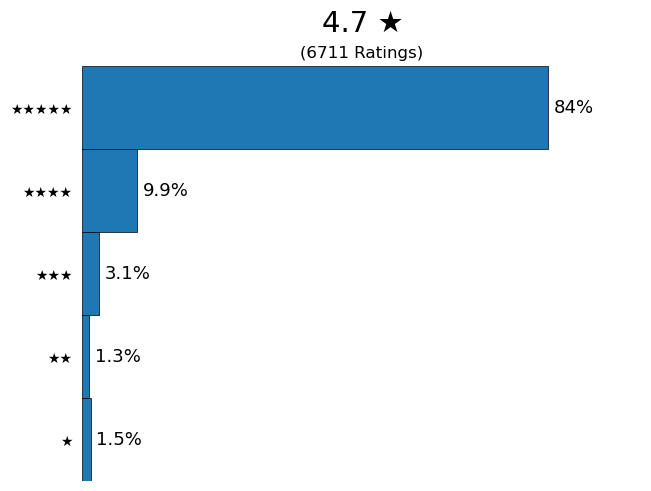

In [76]:
print("Raw ratings:")
viz.plot_ratings(all_reviews.rating)

In [77]:
helpful_reviews = rev.sort_reviews(recommendations['reviews'])
helpful_reviews

,user_id,product_id,title,review,rating,upvotes,downvotes,timestamp,quality
3004,A3IB1W0SVED0Z3,B000IEZE3G,A magical read&#65533;in more ways than one!,What a wonderful book! I read it after my 11-y...,5,45,2,959040000,14.694379
4943,A1Y8894AO7LXLL,B000IEZE3G,Harry Potter and the Sorcerer's Stone,Harry Potter and the Sorcerer's Stone by J.K. ...,5,12,0,949363200,11.690115
4941,A21LH3VS24STZ9,B000IEZE3G,Harry Potter is for all,"As a writer, I'm not ashamed to admit I have a...",5,12,0,966988800,11.690115
4942,None,B000IEZE3G,A magical book,I heard so much about Book 4 in the series thr...,5,12,0,964051200,11.690115
4940,A2G6VWD0GDY5PS,B000IEZE3G,Can I Even Begin with them?,When I first picked up this book it was the ch...,5,12,0,1027036800,11.690115
...,...,...,...,...,...,...,...,...,...
5988,None,B000IEZE3G,I must be the only person in the world...,I must be the only person in the world to not ...,2,4,4,915753600,1.163385
5987,A1N6712C6JHYJ9,B000IEZE3G,A Christian Review: I'm now a fan.,"I must admit, with all the Christian hoopla su...",5,4,4,996969600,1.163385
1075,A1BG9FXFSSM3NK,B000IEZE3G,"This book, a bad book?...?... YEAH RIGHT!",Ok lets get this review started by saying that...,5,6,6,991612800,1.118013
1076,A2XAWBF5J47ECS,B000IEZE3G,STUPID!,The storyline is pretty good. I do like the id...,2,6,6,972864000,1.118013


Ratings with more helpful than unhelpful votes:


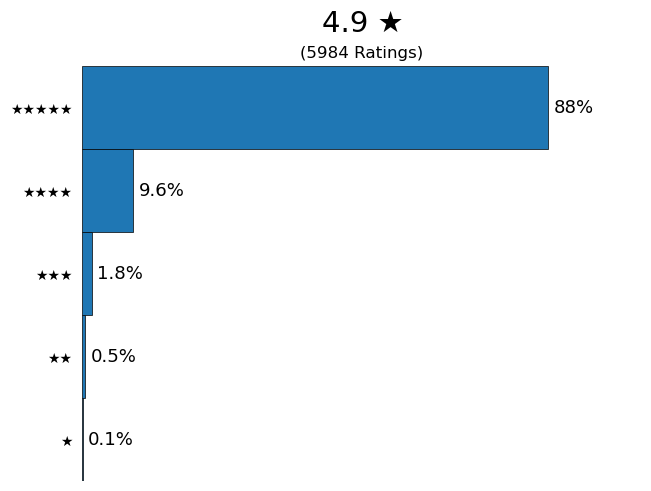

In [78]:
print(f"Ratings with more helpful than unhelpful votes:")
viz.plot_ratings(helpful_reviews.rating)

Interesting! Filtering unhelpful reviews substantially changes the distribution of ratings, all but eliminating the low end of the spectrum - all while removing about 10% of ratings.

## Recommendations

In [79]:
book_recommendations = recommendations["recommendations"]
book_recommendations[:10]

,similarity,title,creator,publisher,description,category,subcategory,release_date
B000N76ZCC,0.775787,Harry Potter & the Prisoner of Azkaban,Lisa S. Brenner,McFarland,"Through classroom activities, wizard rock conc...",Books,Literary Criticism,2015-06-11
B000NPEWHE,0.729994,Harry Potter and the Chamber of Secrets,J. K. Rowling,Raincoast Books,"Witchcraft, wizardry - fiction.",Books,Juvenile Fiction,1999
B000GQG5MA,0.486340,"The Hobbit; Or, There and Back Again",nan,None,None,Books,nan,None
B000Q032UY,0.484644,The Hobbit or There and Back Again,J. R. R. Tolkien,Mariner Books,Celebrating 75 years of one of the world's mos...,Books,Juvenile Fiction,2012
B000ILIJE0,0.484644,The Hobbit There and Back Again,John Ronald Reuel Tolkien,None,"The adventures of the well-to-do hobbit, Bilbo...",Books,Adventure stories,1966
B000NWU3I4,0.484644,"The Hobbitt, or there and back again; illustra...",J. R. R. Tolkien,Houghton Mifflin Harcourt,"Bilbo Baggins, a respectable, well-to-do hobbi...",Books,Fiction,2013
B000NDSX6C,0.484644,The Hobbit,J. R. R. Tolkien,Mariner Books,Celebrating 75 years of one of the world's mos...,Books,Juvenile Fiction,2012
B000NNOTXI,0.480117,To Kill a Mocking Bird,Harper Lee,Dramatic Publishing,Harper Lee's classic novel of a lawyer in the ...,Books,Drama,1970
0808510258,0.480117,Harper Lee's To Kill a Mockingbird (Barron's B...,"Joyce Milton, Harper Lee",Turtleback Books,"A guide to reading ""To Kill A Mockingbird"" wit...",Books,Juvenile Nonfiction,1984-10-01
0816156921,0.436613,Dracula (G. K. Hall (Large Print)),"Bram Stoker, Grand Theatre Collection (Univers...",None,Having deduced the double identity of Count Dr...,Books,High interest-low vocabulary books,199?


## Filtering

Unfiltered recommendations took over 10sec in this case and resulted in products with universally low similarity scores, leading to the development of filters. 

This case is a good example for exploring how filtering reviewers and/or products affects performance and recommendations:

### Raw Recommendations
Let's remove all the filters and see a recommendation based on the full set of reviews related to this product:

In [80]:
raw_recommendations = q.get_recommendations(
    category = category, search_term = search_term, search_field = field, exact_match = exact_match,
    conn = conn, 
    filter_unhelpful_reviews = False, reviewer_max_pool_size = None
)
raw_recommendations['recommendations']

find_products: 1 results in 0.016 seconds
0.0164: Found 1 products
SELECT * FROM review WHERE product_id IN (?)
['B000IEZE3G']
0.0314: Got 6711 reviews
0.157: Got 49380 related reviews of 21570 products by 3663 users
0.171: Filtered 19852 related reviews by user and/or product
0.184: Created ratings table for 1000 products by 3663 users
0.223: Calculated similarities
0.335: Removed 86 duplicate editions of the same product
0.336: Added product details


,similarity,title,creator,publisher,description,category,subcategory,release_date
B000NPEWHE,0.410490,Harry Potter and the Chamber of Secrets,J. K. Rowling,Raincoast Books,"Witchcraft, wizardry - fiction.",Books,Juvenile Fiction,1999
B000N76ZCC,0.346244,Harry Potter & the Prisoner of Azkaban,Lisa S. Brenner,McFarland,"Through classroom activities, wizard rock conc...",Books,Literary Criticism,2015-06-11
B000Q032UY,0.156430,The Hobbit or There and Back Again,J. R. R. Tolkien,Mariner Books,Celebrating 75 years of one of the world's mos...,Books,Juvenile Fiction,2012
B000ILIJE0,0.156430,The Hobbit There and Back Again,John Ronald Reuel Tolkien,None,"The adventures of the well-to-do hobbit, Bilbo...",Books,Adventure stories,1966
B000NWU3I4,0.155261,"The Hobbitt, or there and back again; illustra...",J. R. R. Tolkien,Houghton Mifflin Harcourt,"Bilbo Baggins, a respectable, well-to-do hobbi...",Books,Fiction,2013
...,...,...,...,...,...,...,...,...
034073891X,0.081258,Hearts in Atlantis,Stephen King,Simon and Schuster,King mesmerizes readers with fiction deeply ro...,Books,Fiction,2017-11-14
B000HM6M30,0.080878,The Drawing of the 3: The Dark Tower II,Stephen King,Donald m Grant Pub Incorporated,After his confrontation with the man in black ...,Books,Fiction,1987
0753110296,0.080336,Interview with the Vampire,Anne Rice,"Random House Digital, Inc.",Recounting his first two hundred years of life...,Books,Fiction,1977
B000PVY3FW,0.080336,Interview With The Vampire SIGNED First Edition,Anne Rice,Hachette UK,From #1 New York Times bestselling author Anne...,Books,Fiction,2015-01-29


## Filter sparse users or products

In [81]:
# Experimentation has shown that filtering by users with many reviews (not by products with many reviews)
# produces the highest similarity scores and seemingly sensible recommendations.
user_count_cutoff = None
product_count_cutoff = 100

ratings_by_user = related_reviews.groupby('user_id')['rating'].count().sort_values(ascending = False)
ratings_by_user

NameError: name 'related_reviews' is not defined

In [ ]:
ratings_by_user.value_counts(normalize=True).cumsum()[:20]

rating
1     0.394464
2     0.483276
3     0.545559
4     0.584775
5     0.614764
6     0.638985
7     0.659746
10    0.677047
13    0.692042
11    0.707036
9     0.720877
12    0.734717
20    0.743945
18    0.753172
8     0.762399
14    0.770473
17    0.778547
21    0.786621
53    0.794694
28    0.801615
Name: proportion, dtype: float64

In [ ]:
ratings_by_product = related_reviews.groupby('product_id')['rating'].count().sort_values(ascending = False)
ratings_by_product

product_id
B000IEZE3G    867
B000NPEWHE    202
B000N76ZCC    144
B000Q032UY     46
B000ILIJE0     46
             ... 
0940242141      1
0940242303      1
0941678423      1
0942235304      1
B005MX54HO      1
Name: rating, Length: 11007, dtype: int64

In [ ]:
ratings_by_product.value_counts(normalize=True).cumsum()[:20]

rating
1     0.736350
2     0.863451
3     0.913510
4     0.937403
5     0.950577
6     0.959844
8     0.967657
7     0.974743
9     0.980921
10    0.985100
11    0.987553
12    0.990006
16    0.992187
13    0.993913
20    0.995639
14    0.996729
19    0.997456
27    0.998183
18    0.998728
15    0.999001
Name: proportion, dtype: float64

In [ ]:

def filter_reviews(reviews: pd.DataFrame, user_cutoff = None, product_cutoff = None) -> pd.DataFrame:
    result = reviews.copy()
    if user_count_cutoff != None:
        ratings_by_user = related_reviews.groupby('user_id')['rating'].count().sort_values(ascending = False)
        users = ratings_by_user[:user_count_cutoff]
        result = result[related_reviews.user_id.isin(users.index)]

    if product_count_cutoff != None:
        ratings_by_product = related_reviews.groupby('product_id')['rating'].count().sort_values(ascending = False)
        products = ratings_by_product[:product_count_cutoff]
        result = result[related_reviews.product_id.isin(products.index)]
    return result

related_reviews_filtered = filter_reviews(related_reviews, user_count_cutoff, product_count_cutoff)
related_reviews_filtered

,user_id,product_id,title,review,rating,upvotes,downvotes,timestamp
1,A1058D8UFZL711,B000IEZE3G,About the Series,It is really difficult to speak to everyone's ...,5,1,0,1185926400
2,A10A8EMU0FLK49,B000IEZE3G,This mom loved the books,I bought all three Harry Potter books for my 1...,5,4,0,943747200
3,A10EH95EUDO9W3,0060765461,"Once a child's book, now a classic literature","When I was in junior high school, my teacher i...",4,0,0,956016000
31,A10EH95EUDO9W3,B00005W9DZ,"Once a child's book, now a classic literature","When I was in junior high school, my teacher i...",4,0,0,956016000
41,A10EH95EUDO9W3,B000G1JYHI,"Once a child's book, now a classic literature","When I was in junior high school, my teacher i...",4,0,0,956016000
...,...,...,...,...,...,...,...,...
21052,AZXQKAMHK35PA,1850891648,Different and Better than Expected.,I have seen so many Frankenstein movies. As a ...,5,0,0,1119225600
21058,AZXQKAMHK35PA,B000F5X89K,Different and Better than Expected.,I have seen so many Frankenstein movies. As a ...,5,0,0,1119225600
21060,AZXQKAMHK35PA,B000GLJG76,Wonderful,This book was wonderful. It is a story of work...,5,2,1,1117756800
21062,AZXQKAMHK35PA,B000IEZE3G,Great - got me (an adult) to start reading again,When I picked up this book to read a couple of...,5,3,0,1120780800


In [ ]:
recommendations = q.get_recommendations_from_reviews(product.id, related_reviews_filtered, conn)
recommendations[:20]

0.00257: Created pivot table of ratings for 100 products by 867 users
0.00339: Created sparse matrix
0.00384: Calculated similarities
0.00531: Added product details


,similarity,title,title_search,creator,creator_search,publisher,description,category,subcategory,release_date
B000NPEWHE,0.482089,Harry Potter and the Chamber of Secrets,harrypotterandchamberofsecrets,J. K. Rowling,jkrowling,Raincoast Books,"Witchcraft, wizardry - fiction.",Books,Juvenile Fiction,1999
B000N76ZCC,0.401933,Harry Potter & the Prisoner of Azkaban,harrypotterprisonerofazkaban,Lisa S. Brenner,lisasbrenner,McFarland,"Through classroom activities, wizard rock conc...",Books,Literary Criticism,2015-06-11
B000Q032UY,0.220454,The Hobbit or There and Back Again,hobbitorreandbackagain,J. R. R. Tolkien,jrrtolkien,Mariner Books,Celebrating 75 years of one of the world's mos...,Books,Juvenile Fiction,2012
B000ILIJE0,0.220454,The Hobbit There and Back Again,hobbitreandbackagain,John Ronald Reuel Tolkien,johnronaldreueltolkien,None,"The adventures of the well-to-do hobbit, Bilbo...",Books,Adventure stories,1966
B000GQG5MA,0.220085,"The Hobbit; Or, There and Back Again",reandbackagainhobbitor,nan,nan,None,None,Books,nan,None
B000NDSX6C,0.217727,The Hobbit,hobbit,J. R. R. Tolkien,jrrtolkien,Mariner Books,Celebrating 75 years of one of the world's mos...,Books,Juvenile Fiction,2012
B000NWU3I4,0.217008,"The Hobbitt, or there and back again; illustra...",orreandbackagainillustratedbyauthorhobbitt,J. R. R. Tolkien,jrrtolkien,Houghton Mifflin Harcourt,"Bilbo Baggins, a respectable, well-to-do hobbi...",Books,Fiction,2013
B000JJVHZE,0.175797,To Kill A Mockingbird,tokillamockingbird,Harper Lee,harperlee,Harper Collins,Voted America's Best-Loved Novel in PBS's The ...,Books,Fiction,2014-07-08
B000K7WNQW,0.175797,To Kill a Mockingbird,tokillamockingbird,Harper Lee,harperlee,Dramatic Publishing,Harper Lee's classic novel of a lawyer in the ...,Books,Drama,1970
B0007DRGI4,0.175797,To kill a mockingbird,tokillamockingbird,Harper Lee,harperlee,Harper Collins,Voted America's Best-Loved Novel in PBS's The ...,Books,Fiction,2014-07-08
